In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

In [3]:
reports_dir = "../reports/arrayUnit"

# Ensure the directory exists
if not os.path.exists(reports_dir):
    print(f"Directory {reports_dir} does not exist.")
    exit(1)

reports = []

# Iterate through files in the directory
for filename in os.listdir(reports_dir):
    if filename.endswith(".csv"):  # Process only .txt files (adjust as needed)
        file_path = os.path.join(reports_dir, filename)
        print(f"Processing file: {filename}")
        
        # Extract fields separated by underscores
        fields = filename.split('_')
        print(f"Extracted fields: {fields}")

        b = fields[2][1:]
        c = fields[3][1:]
        mr = fields[4][2:]
        k = fields[5][1:]

        # Read space-delimited file and clean up
        with open(file_path, 'r') as f:
            lines = f.readlines()
        
        # Find the start of the utilization table
        start_index = None
        for i, line in enumerate(lines):
            # if line.strip().startswith("+---------------------+"):
            if "+--" in line.strip():
                start_index = i + 1
                break
        
        if start_index is None:
            print("Utilization table not found in the file.")
            continue
        
        # Extract the table data
        table_lines = lines[start_index:]
        table_data = []
        for line in table_lines:
            if line.strip().startswith("+"):
                continue  # Skip separator lines
            if line.strip() == "":
                break  # Stop at the end of the table
            if "Instance" in line.strip().split('|')[1]:
                continue
            table_data = line.strip().split("|")[1:-1]  # Split columns and remove borders
            break
        table_data = [item.strip() for item in table_data]

        table_data = [int(i) if i.strip().isdigit() else i for i in table_data]
        
        # Convert the table data to a DataFrame
        columns = ["Instance", "Module", "Total LUTs", "Logic LUTs", "LUTRAMs", "SRLs", "FFs", "RAMB36", "RAMB18", "DSP Blocks"]
        d = {key: value for key, value in zip(columns, table_data)}
        d["B"] = int(b)
        d["C"] = int(c)
        d["MR"] = int(mr)
        d["K"] = int(k)
        reports.append(d)

Processing file: u_arrayUnit_b8_c8_mr8_k9_.csv
Extracted fields: ['u', 'arrayUnit', 'b8', 'c8', 'mr8', 'k9', '.csv']
Processing file: u_arrayUnit_b8_c8_mr8_k10_.csv
Extracted fields: ['u', 'arrayUnit', 'b8', 'c8', 'mr8', 'k10', '.csv']
Processing file: u_arrayUnit_b8_c8_mr8_k16_.csv
Extracted fields: ['u', 'arrayUnit', 'b8', 'c8', 'mr8', 'k16', '.csv']
Processing file: u_arrayUnit_b8_c8_mr8_k4_.csv
Extracted fields: ['u', 'arrayUnit', 'b8', 'c8', 'mr8', 'k4', '.csv']
Processing file: u_arrayUnit_b8_c8_mr8_k15_.csv
Extracted fields: ['u', 'arrayUnit', 'b8', 'c8', 'mr8', 'k15', '.csv']
Processing file: u_arrayUnit_b8_c8_mr8_k14_.csv
Extracted fields: ['u', 'arrayUnit', 'b8', 'c8', 'mr8', 'k14', '.csv']
Processing file: u_arrayUnit_b8_c8_mr8_k2_.csv
Extracted fields: ['u', 'arrayUnit', 'b8', 'c8', 'mr8', 'k2', '.csv']
Processing file: u_arrayUnit_b8_c8_mr8_k12_.csv
Extracted fields: ['u', 'arrayUnit', 'b8', 'c8', 'mr8', 'k12', '.csv']
Processing file: u_arrayUnit_b8_c8_mr8_k5_.csv
Extract

In [4]:
reports.sort(key=lambda x: x["K"])

In [5]:
def array_regs(b,c,K):
    return b * K + c * (K**2 + 3*K -2) + K * K 
    # return b * K + c * (K**2) + K * K 

Text(0.5, 1.0, 'FFs(K) at B=8 C=8 MR=8')

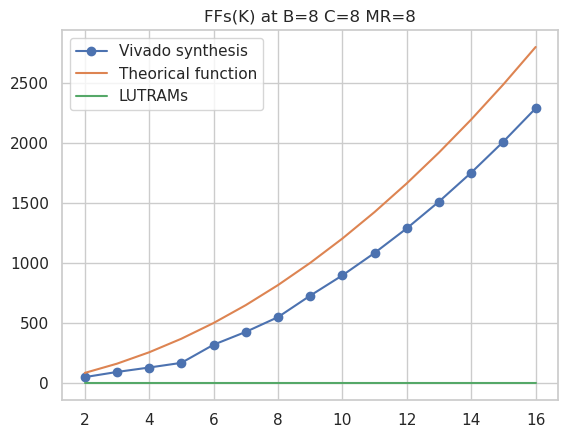

In [9]:
ks = []
ffs = []
lutrams = []
true_ffs = []
B = 8
C = 8
MR = 8
for report in filter(lambda x: x["B"] == B and x["C"] == C and x["MR"] == MR, reports):
    ks.append(report["K"])
    ffs.append(report["FFs"])
    lutrams.append(report["LUTRAMs"])
    true_ffs.append(array_regs(report["B"], report["C"], report["K"]))

plt.plot(ks, ffs, marker='o', label='Vivado synthesis')
plt.plot(ks, true_ffs, label='Theorical function')
plt.plot(ks, lutrams, label='LUTRAMs')
plt.legend()
plt.title(f'FFs(K) at B={B} C={C} MR={MR}')

    

In [8]:
reports

[{'Instance': 'arrayUnit',
  'Module': 'ArrayUnit',
  'Total LUTs': 64,
  'Logic LUTs': 64,
  'LUTRAMs': 0,
  'SRLs': 0,
  'FFs': 49,
  'RAMB36': 0,
  'RAMB18': 0,
  'DSP Blocks': 0,
  'B': 8,
  'C': 8,
  'MR': 8,
  'K': 2},
 {'Instance': 'arrayUnit',
  'Module': 'ArrayUnit',
  'Total LUTs': 126,
  'Logic LUTs': 126,
  'LUTRAMs': 0,
  'SRLs': 0,
  'FFs': 92,
  'RAMB36': 0,
  'RAMB18': 0,
  'DSP Blocks': 0,
  'B': 8,
  'C': 8,
  'MR': 8,
  'K': 3},
 {'Instance': 'arrayUnit',
  'Module': 'ArrayUnit',
  'Total LUTs': 238,
  'Logic LUTs': 238,
  'LUTRAMs': 0,
  'SRLs': 0,
  'FFs': 129,
  'RAMB36': 0,
  'RAMB18': 0,
  'DSP Blocks': 0,
  'B': 8,
  'C': 8,
  'MR': 8,
  'K': 4},
 {'Instance': 'arrayUnit',
  'Module': 'ArrayUnit',
  'Total LUTs': 332,
  'Logic LUTs': 332,
  'LUTRAMs': 0,
  'SRLs': 0,
  'FFs': 168,
  'RAMB36': 0,
  'RAMB18': 0,
  'DSP Blocks': 0,
  'B': 8,
  'C': 8,
  'MR': 8,
  'K': 5},
 {'Instance': 'arrayUnit',
  'Module': 'ArrayUnit',
  'Total LUTs': 587,
  'Logic LUTs': 587